# Random Vectors Simulation

* Erick Eduardo Agular Hernández
* mat.ErickAguilar@ciencias.unam.mx
____

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 
plt.style.use('ggplot')
#np.random.seed(45)
seed = 45

### Simulating a cotinuous random variable
____

**Probability change variable theorem - corolary:**

Supose than the randon variable $X$ has distribution function $F_X(x;\theta)$ so if $Q \sim U(0,1)$ then the randon variable $F_X^{-1}(Q;\theta) \sim X$

**Example:**

Suposse than $X \sim exp(\lambda)$ so $F_X(x;\lambda)=1-e^{-\lambda x}$ so f q is and observation from the distribution $U(0,1)$ so x is and observation from the $exp(\lambda)$:

$$x = -\frac{1}{\lambda}\ln(1-q)$$


In [2]:
def gen_exp(lambda_param):
    q = np.random.uniform(0,1)
    return (-1/lambda_param)*np.log(1-q)

def gen_sample_expon(lambda_param, n):
    X = []
    for x in range(0,n):
        X.append(gen_exp(lambda_param))
    return X

<Axes: ylabel='Count'>

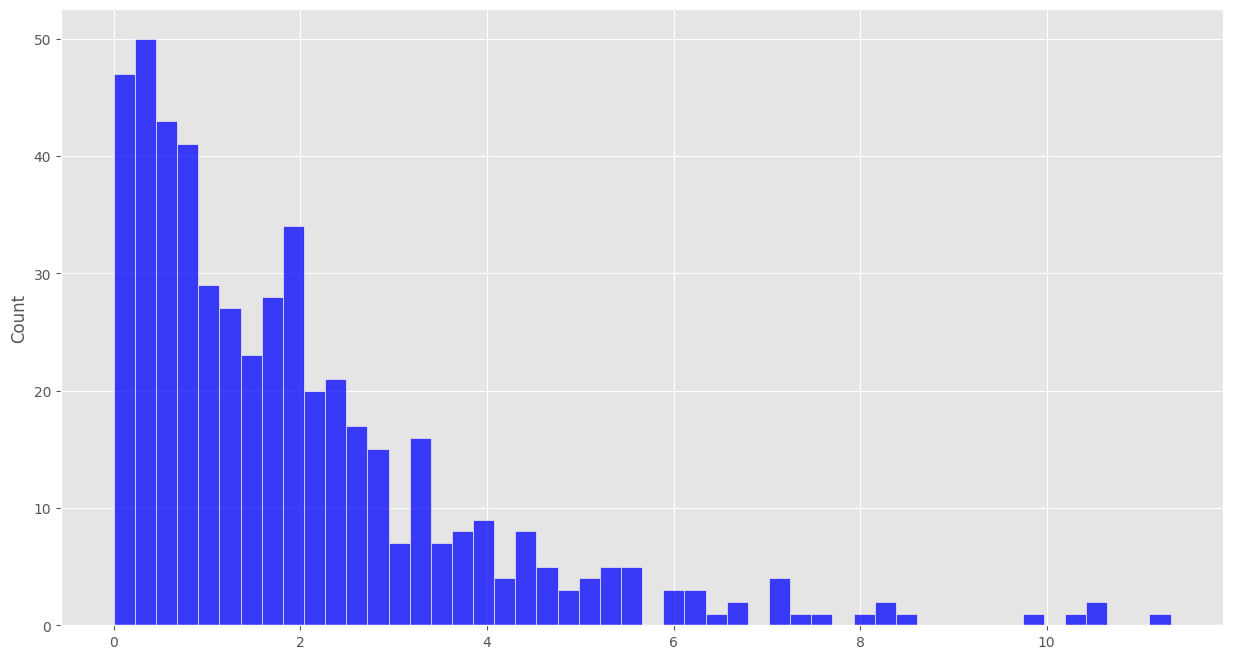

In [3]:
n = 500
lambda_param = 1/2
X = gen_sample_expon(lambda_param, n)
plt.figure(figsize=(15,8))
sns.histplot(X, bins=50, color='Blue')

<Axes: xlabel='n', ylabel='mean'>

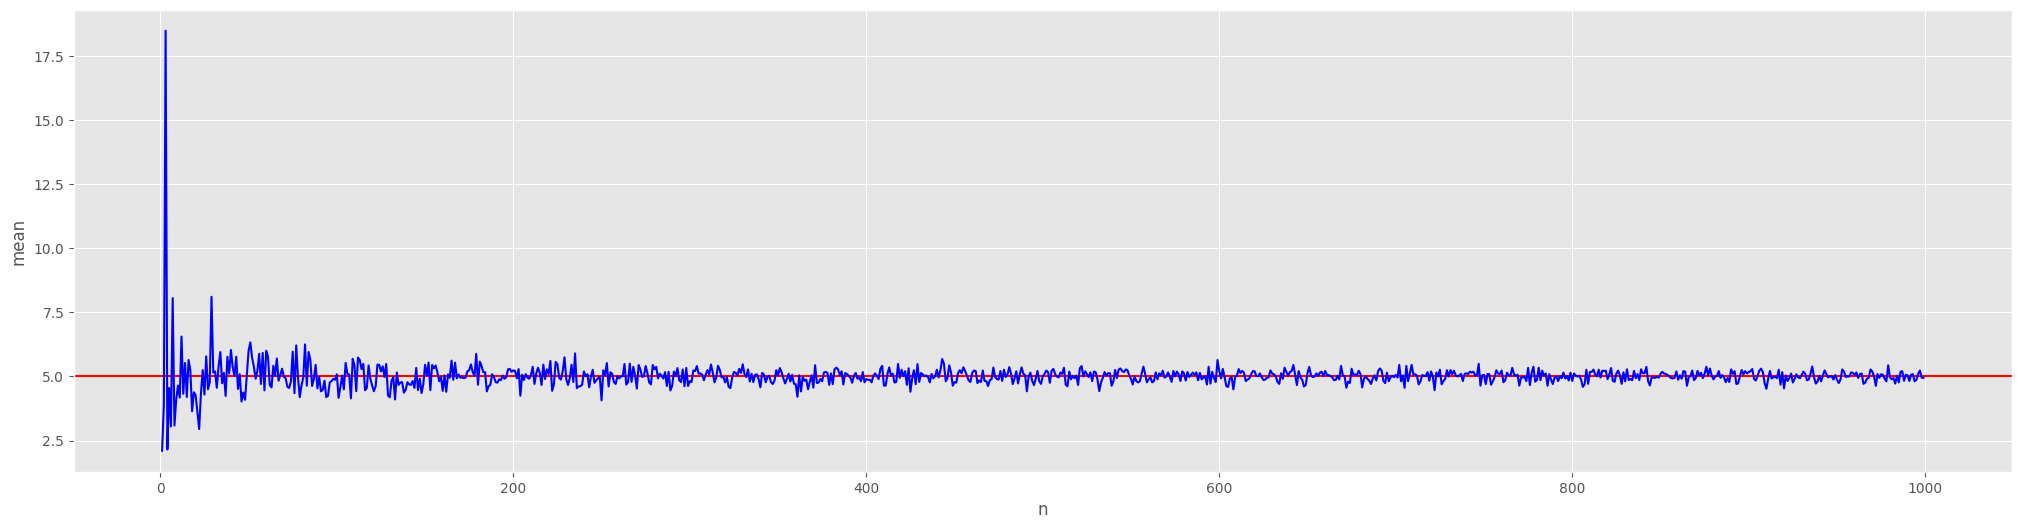

In [4]:
t = 1000
estimators = []
lambda_param = 1/5

for i in range(1,t):
    X = gen_sample_expon(lambda_param, n=i)
    estimators.append([i, np.mean(X)])
    
df = pd.DataFrame(estimators, columns=['n','mean'])

plt.figure(figsize=(25,6))
plt.axhline(y=1/lambda_param, color='Red')
sns.lineplot(data=df, x='n', y='mean', color='Blue')

### Simulating a discrete random variable with scipy package
____

In [5]:
from scipy import stats 

a, b = 3, 4
n = 6000

gamma_dist = stats.gamma(a=a,scale=b)
gamma_sample = gamma_dist.rvs(size=n)

estimated (2.8964502185277508, 0.11143322659966051, 4.1147860672913446)


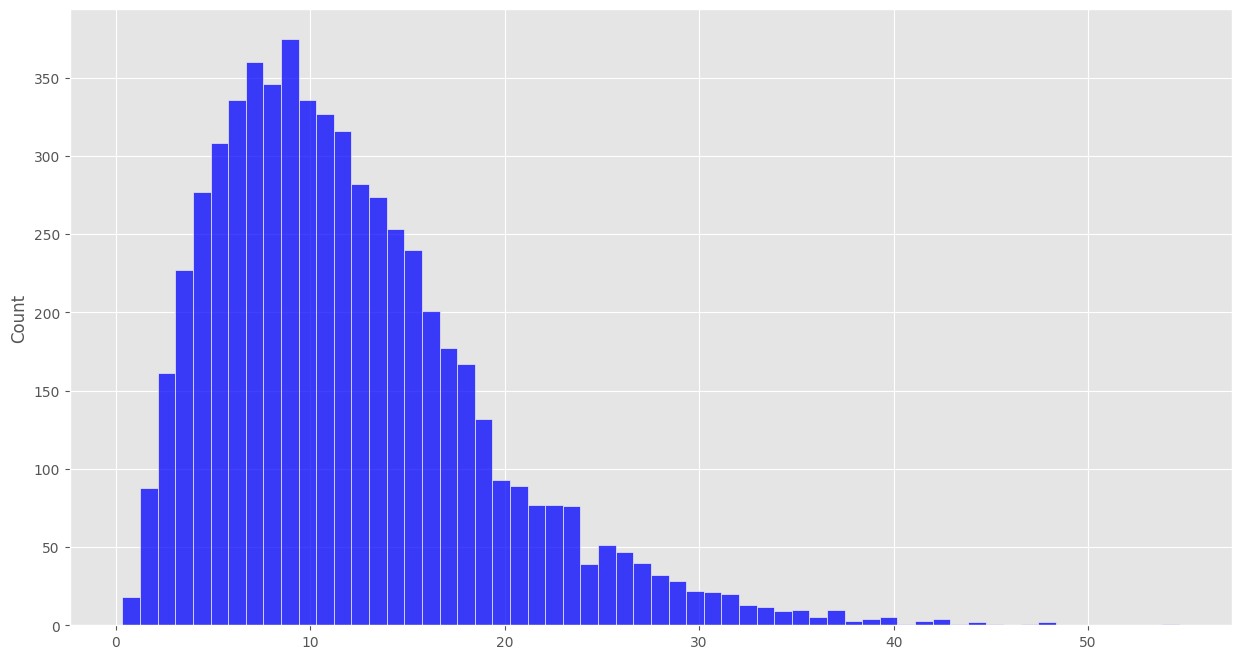

In [6]:
gamma_dist_est = stats.gamma.fit(gamma_sample)
plt.figure(figsize=(15,8))
sns.histplot(gamma_sample, bins=60, color='Blue')
print('estimated',gamma_dist_est)

# Generating random vectors
____

Lets the random vector $\mathbf{x}=(X_1,X_2)'$ with pdf:
$$ f_{X_1,X_2}(x_1,x_2) = 3x_1 \quad 0 \leq x_2 \leq x_1 \leq 1$$

Based on the fact that:

$$ 
\begin{align*}
    f_{X_2|X_1}(x_1;x_2) &= \frac{f_{X_1,X_2}(x_1,x_2)}{f_{X_1}(x_1)}\\
    \implies f_{X_1,X_2}(x_1,x_2) &= f_{X_1}(x_1)f_{X_2|X_1}(x_2|x_1) \\
\end{align*}
$$

In this case:


$$ 
\begin{align*}
    f_{X_1}(x_1) &= 3x_1^2 \quad 0 \leq x_1 \leq 1\\
    f_{X_2|X_1}(x_2;x_1) &= \frac{3x_1}{3x_1^2}\\
    f_{X_2|X_1}(x_2;x_1) &=\frac{1}{x_1} \quad 0 \leq x_2 \leq x_1\\
    \implies X_2 | X_1 &\sim U(0,x_1)
\end{align*}
$$

Using the coloray from change variable theorem for some $q \sim U(0,1)$:
    
$$ 
\begin{align*}
    F_{X_1}(x_1) &= x_1^3 = q\\
    x_1 &= q^{1/3}
\end{align*}
$$

Finaly we have:

$$ 
\begin{align*}
    x_1 &= q^{1/3} \quad \text{where } q \sim U(0,1)\\
    x_2 & \quad \text{where } X_2 | X_1 \sim U(0,x_1) \\
\end{align*}
$$
 
So the vector $\mathbf{x} = (x_1,x_2)$ has the density function $f_{X_1,X_2}(x_1,x_2)$

This randon vector has:
$$
\mathbf{\mu_x} = \begin{bmatrix} 
      0.75\\
      0.375\\
   \end{bmatrix} \quad
\mathbf{\Sigma_x} = \begin{bmatrix} 
      0.0375&0.01875\\
      0.1875&0.059375\\
   \end{bmatrix} \quad
\mathbf{\rho_x} = \begin{bmatrix} 
      1&0.397\\
      0.3973&1\\
   \end{bmatrix}
$$

In [7]:
def sim_vector():
    q = np.random.uniform(0,1)
    x_1 = np.power(q, 1/3)
    x_2 = np.random.uniform(0,x_1)
    return [x_1, x_2]

sim_vector()

[0.8239709763268602, 0.8066141361508232]

,x_1,x_2
0,0.654343,0.590488
1,0.610319,0.158222
2,0.939318,0.154203
3,0.963622,0.824220
4,0.814210,0.212086
5,0.946739,0.104699
6,0.946757,0.171788
7,0.716344,0.556384
8,0.971813,0.188616
9,0.919988,0.814035


<Axes: xlabel='x_1', ylabel='x_2'>

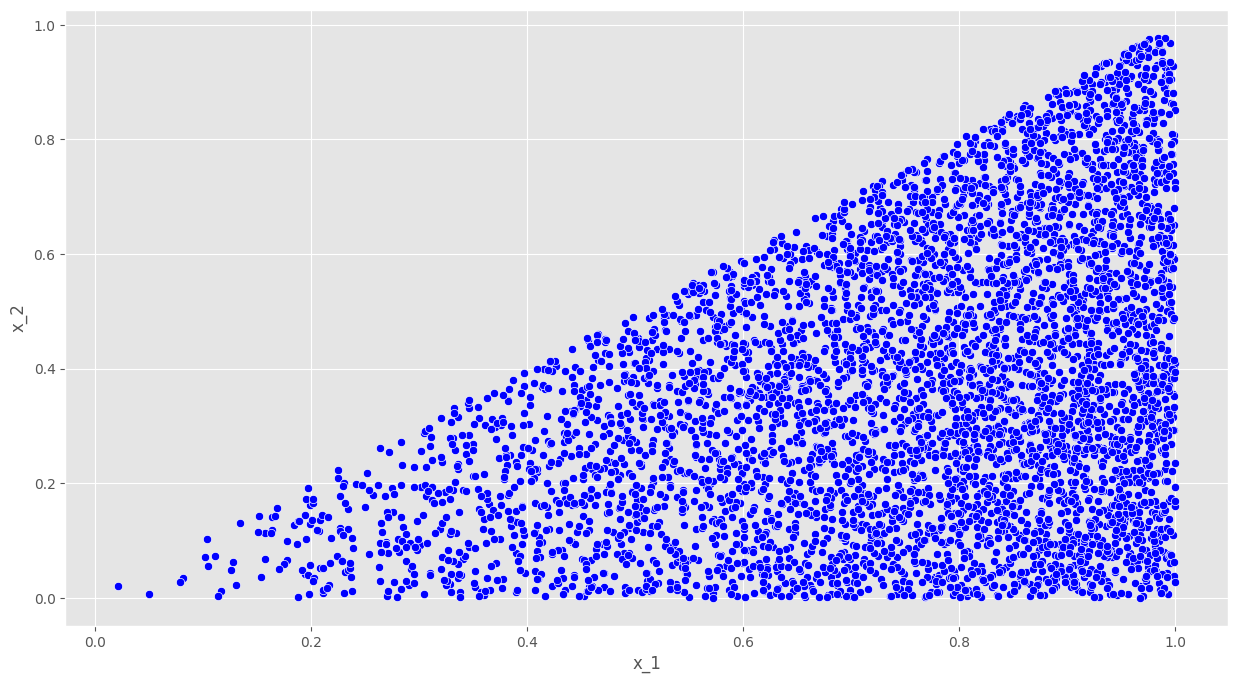

In [8]:
n = 5000
X = []
for i in range(0,n):
    X.append(sim_vector())

data_matrix_df = pd.DataFrame(X, columns=['x_1','x_2'])
display(data_matrix_df.head(10))

plt.figure(figsize=(15,8))
sns.scatterplot(data=data_matrix_df, x='x_1', y='x_2', color='Blue')

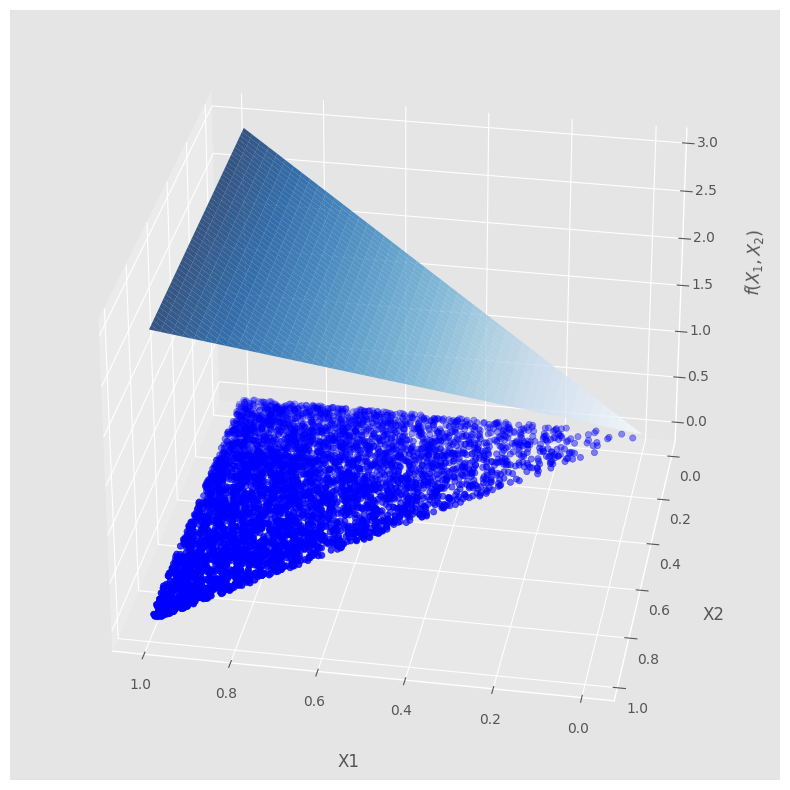

In [9]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')
plt.rcParams['axes.facecolor']='white'

(X1, X2) = np.meshgrid(np.arange(0, 1, 0.02), np.arange(0, 1, 0.02))
Z = 3*X1
for i in range(0,len(Z)):
    for j in range(0,len(Z[0])):
        if j < i:
            Z[i][j] = np.nan
surf = ax.plot_surface(X1, X2, Z, cmap = 'Blues', alpha=0.8)
ax.scatter3D(data_matrix_df['x_1'], data_matrix_df['x_2'], [0]*len(data_matrix_df), color = "blue")
ax.set_xlabel('X1', labelpad=20)
ax.set_ylabel('X2', labelpad=20)
ax.set_zlabel('$f(X_1,X_2)$', labelpad=20)
ax.view_init(30, 100)
plt.show()

In [10]:
print('mean_vector:',0.75,0.375)
print('sample_mean_vector:',data_matrix_df.mean())

mean_vector: 0.75 0.375
sample_mean_vector: x_1    0.749270
x_2    0.369821
dtype: float64


In [11]:
data_matrix_df.cov()

,x_1,x_2
x_1,0.037807,0.018426
x_2,0.018426,0.058500


<Axes: title={'center': 'Sample covariance'}>

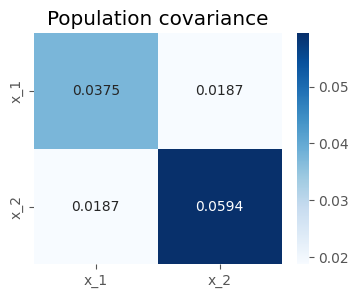

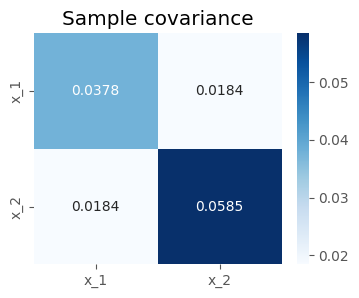

In [12]:
cov_matrix_df = pd.DataFrame([[0.0375,0.01875],[0.01875,0.05937]], columns=['x_1','x_2'],index=['x_1','x_2'])
plt.figure(figsize=(4,3))
plt.title('Population covariance')
sns.heatmap(data=cov_matrix_df, annot=True,fmt=".4f",cmap="Blues")

plt.figure(figsize=(4,3))
plt.title('Sample covariance')
sns.heatmap(data=data_matrix_df.cov(), annot=True,fmt=".4f",cmap="Blues")

In [13]:
data_matrix_df.corr()

,x_1,x_2
x_1,1.000000,0.391812
x_2,0.391812,1.000000


<Axes: title={'center': 'Sample correlation'}>

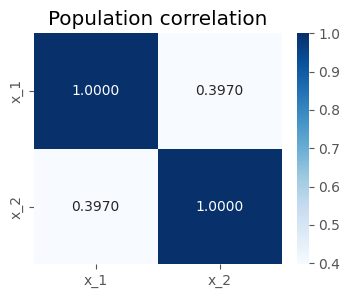

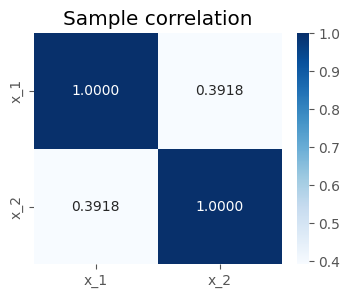

In [14]:
corr_matrix_df = pd.DataFrame([[1,0.397],[0.397,1]], columns=['x_1','x_2'],index=['x_1','x_2'])

plt.figure(figsize=(4,3))
plt.title('Population correlation')
sns.heatmap(data=corr_matrix_df, annot=True,fmt=".4f",cmap="Blues")

plt.figure(figsize=(4,3))
plt.title('Sample correlation')
sns.heatmap(data=data_matrix_df.corr(), annot=True,fmt=".4f",cmap="Blues")